# Replicates Latent Semantic Indexing (LSI) Experiments from:

Berry, M. W., Dumais, S. T., & O’Brien, G. W. (1995). Using linear algebra for intelligent information retrieval. SIAM review, 37(4), 573-595.

In [0]:
import string
import re

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from scipy.linalg import svd

In [0]:
# document terms
terms = [
             "algorithm",
             "application",
             "delay",
             "differential",
             "equation",
             "implementation",
             "integral",
             "introduction",
             "method",
             "nonlinear",
             "ordinary",
             "oscillation",
             "partial",
             "problem",
             "system",
             "theory"
]

In [0]:
# documents
documents = [
                 "Course on Integral Equations",
                 "Attractors for Semigroups and Evolution Equations",
                 "Automatic Differentiation of Algorithms: Theory, Implementation, and Application",
                 "Geometrical Aspects of Partial Differential Equations",
                 "Ideals, Varieties, and Algorithms - An Introduction to Computational Algebraic Geometry and Commutative Algebra",
                 "Introduction to Hamiltonian Dynamical Systems and the N-Body Problem",
                 "Knapsack Problems: Algorithms and Computer Implementations",
                 "Methods of Solving Singular Systems of Ordinary Differential Equations",
                 "Nonlinear Systems",
                 "Ordinary Differential Equations",
                 "Oscillation Theory for Neutral Differential Equations with Delay",
                 "Oscillation Theory of Delay Differential Equations",
                 "Pseudodifferential Operators and Nonlinear Partial Differential Equations",
                 "Sinc Methods for Quadrature and Differential Equations",
                 "Stability of Stochastic Differential Equations with Respect to Semi-Martingales",
                 "Boundary Integral Approach to Static and Dynamic Contact Problems",
                 "Double Mellin-Barnes Type Integrals and Their Applications to Convolution Theory"                
]

In [0]:
##########################################
# Helper functions for document encoding #
##########################################

def doc_terms(doc):
  """ generates a list of terms that appear in this document """
  # remove punctuation
  doc = doc.translate(str.maketrans('', '', string.punctuation))

  # remove trailing s
  doc = re.sub(r's\b', '', doc)

  return [t for t in doc.lower().split() if t in terms]

# converts a document to a bag of recognized words
def doc_to_vec(doc):
  """ produces a column vector that encodes term frequencies """
  vec = np.zeros(len(terms))

  for term, freq in Counter(doc_terms(doc)).most_common():
    vec[terms.index(term)] = freq

  return vec.T

## Example Document Encoding

In [5]:
d = documents[16]
print(d)

# example terms in document
print(doc_terms(d))

# example vec
print(doc_to_vec(d))

Double Mellin-Barnes Type Integrals and Their Applications to Convolution Theory
['integral', 'application', 'theory']
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Constructing the term-document matrix

In [6]:
A = np.column_stack([doc_to_vec(doc) for doc in documents])
print(A)

[[0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]]


## (Non-Truncated) SVD

In [0]:
from scipy.linalg import svd

In [0]:
U, sigma, V_trans = svd(A, full_matrices=False)

In [9]:
print('dims(U):', U.shape)
print('dims(Sigma): ', sigma.shape)
print('dims(V transpose):', V_trans.shape)

dims(U): (16, 16)
dims(Sigma):  (16,)
dims(V transpose): (16, 17)


## Truncated SVD

In [0]:
def trunc_svd(A, k):
  U, sigma, V_trans = svd(A, full_matrices=False)
  
  # truncate each matrix
  U = U[:, 0:k]
  sigma = sigma[0:k]
  V_trans = V_trans[0:k, :]

  return U, sigma, V_trans

In [0]:
U, sigma, V_trans = trunc_svd(A, 2)

In [12]:
print('dims(U):', U.shape)
print('dims(Sigma): ', sigma.shape)
print('dims(V transpose):', V_trans.shape)

dims(U): (16, 2)
dims(Sigma):  (2,)
dims(V transpose): (2, 17)


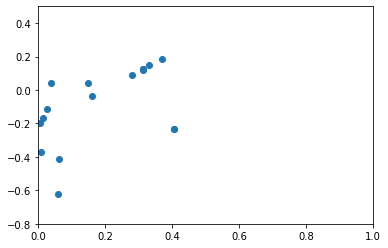

In [13]:
XLIMS = 0, 1.0
YLIMS = -0.8, 0.5

plt.scatter(V_trans[0,:], V_trans[1,:])
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.show()

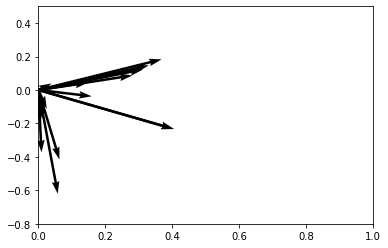

In [14]:
origin = np.zeros(V_trans.shape[1]), np.zeros(V_trans.shape[1])
plt.quiver(*origin, V_trans[0,:], V_trans[1,:], angles='xy', scale_units='xy', scale=1)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.show()

In [0]:
# helper functions
def norm(v1):
  return np.linalg.norm(v1, ord=2) # 2-norm

def sim(v1, v2):
  return np.dot(v1,v2) / (norm(v1) * norm(v2))

## Encoding a query

In [0]:
def encode(query, U, sigma):
  q_trans = doc_to_vec(query).T
  sigma_inv = np.linalg.inv(np.diag(sigma))

  return q_trans.dot(U).dot(sigma_inv)

In [0]:
query = documents[10]

In [29]:
q_hat = encode(query, U, sigma)
print(q_hat)

[ 0.40439253 -0.23335699]


In [19]:
V_trans[:,0]

array([ 0.15911958, -0.03766392])

In [0]:
sims = np.array([sim(q_hat, v) for v in V_trans.T])

In [21]:
sims

array([ 0.37503409, -0.13619171,  0.99825762, -0.21991877,  0.99195876,
        0.99781818,  0.9918644 , -0.30485714, -0.59055349, -0.23264085,
        0.62519945,  0.62519945, -0.26334098, -0.23264085, -0.1479084 ,
        0.99757111,  0.99999714])

In [22]:
# find indices of all documents with cosine similarities > 0.9 
# (note that you must add 1 to these values to match the document ids from the paper)
np.argwhere(sims > 0.9)

array([[ 2],
       [ 4],
       [ 5],
       [ 6],
       [15],
       [16]])